In [1]:
import pandas as pd

In [178]:
def preprocess(x):
    x = x[(x["total_amount"] > 2.5) & (x["total_amount"] < 50)]
    x = x[(x["passenger_count"] > 0) & (x["passenger_count"] < 7)]
    x = x[(x["trip_distance"] > 0) & (x["trip_distance"] < 20)]
    x = x[x["RatecodeID"] == 1]
    x = x[(x["payment_type"] == 1) | (x["payment_type"] == 2)]
    x = x[(x["PULocationID"]!= 264) & (x["PULocationID"]!= 265) & \
          (x["DOLocationID"]!= 264) & (x["DOLocationID"]!= 265)]
    
    
    x = x.astype({'tpep_pickup_datetime':'datetime64[ns]', 'tpep_dropoff_datetime':'datetime64[ns]', \
                 'PULocationID': 'category', 'DOLocationID': 'category', 'payment_type': 'category', \
                 'RatecodeID': 'category', 'VendorID': 'category', 'passenger_count': 'int32', \
                  'trip_distance':'float32', 'fare_amount':'float32', 'extra':'float32', 'mta_tax':'float32', \
                 'tip_amount':'float32', 'tolls_amount':'float32', 'improvement_surcharge':'float32', \
                 'total_amount':'float32'})
    
    x = x.rename(columns = {"tpep_pickup_datetime":"pickup_time", \
                            "tpep_dropoff_datetime":"dropoff_time"})
    return x

In [16]:
def preprocess_green(x):
    x = x.rename(columns = {"lpep_pickup_datetime":"tpep_pickup_datetime", \
                            "lpep_dropoff_datetime":"tpep_dropoff_datetime"})
    x = x.drop(["ehail_fee", "trip_type"], axis = 1)
    return x

In [196]:
def engineer(x):
    x['month'] = pd.DatetimeIndex(x['pickup_time']).month.astype('category')
    x['dow'] = pd.DatetimeIndex(x['pickup_time']).dayofweek.astype('category')
    x['trip_time'] = (x.dropoff_time - x.pickup_time).astype('timedelta64[s]')
    x = x[(x.trip_time > 0) & (x.trip_time < 3600)]
    x['cost'] = x['total_amount'] - x['tip_amount']
    #x['price_bin'] = np.vectorize(brackets)(x['cost'])
    #x['price_bin'] = x['price_bin'].astype('category')
    
    return x

In [6]:
df = pd.read_csv("../../MAST30034_Python/data/2018/yellow_tripdata_2018-01.csv")

In [205]:
import numpy as np
def brackets(x):
    if x < 6.8:
        return 0
    if x < 8.8:
        return 1
    if x < 10.3:
        return 2
    if x < 11.3:
        return 3
    if x < 16.3:
        return 4
    else:
        return 5

In [39]:
def dist_brackets(x):
    if x  < 1:
        return 0
    if x < 3:
        return 1
    if x < 5:
        return 2
    if x < 10:
        return 3
    else:
        return 4

In [80]:
df = preprocess(df)

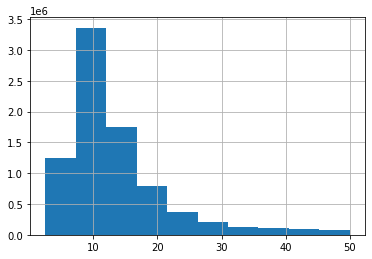

In [82]:
df.total_amount.hist()

In [31]:
df["PULocationID"] = df["PULocationID"].astype("category")
df["DOLocationID"] = df["DOLocationID"].astype("category")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4979381162532534

In [57]:
X_train['dow'].value_counts()

2    982646
1    925483
0    826469
4    816673
5    794233
3    715759
6    679036
Name: dow, dtype: int64

In [51]:
ydf = pd.read_csv("yellow/yellow_tripdata_2018-01.csv")
ydf2 = pd.read_csv("yellow/yellow_tripdata_2018-02.csv")
ydf3 = pd.read_csv("yellow/yellow_tripdata_2018-03.csv")
ydf4 = pd.read_csv("yellow/yellow_tripdata_2018-04.csv")
ydf5 = pd.read_csv("yellow/yellow_tripdata_2018-05.csv")
ydf6 = pd.read_csv("yellow/yellow_tripdata_2018-06.csv")

gdf = pd.read_csv("green/green_tripdata_2018-01.csv")
gdf2 = pd.read_csv("green/green_tripdata_2018-02.csv")
gdf3 = pd.read_csv("green/green_tripdata_2018-03.csv")
gdf4 = pd.read_csv("green/green_tripdata_2018-04.csv")
gdf5 = pd.read_csv("green/green_tripdata_2018-05.csv")
gdf6 = pd.read_csv("green/green_tripdata_2018-06.csv")

In [52]:
gdf = preprocess_green(gdf)
gdf2 = preprocess_green(gdf2)
gdf3 = preprocess_green(gdf3)
gdf4 = preprocess_green(gdf4)
gdf5 = preprocess_green(gdf5)
gdf6 = preprocess_green(gdf6)

In [53]:
combined = pd.concat([ydf, ydf2, ydf3, ydf4, ydf5, ydf6, gdf, gdf2, gdf3, gdf4, gdf5, gdf6])

In [85]:
combined = preprocess(combined)

In [55]:
combined = combined.reset_index(drop=True)

In [88]:
combined.to_pickle("6months_clean.pkl")

In [40]:
combined = engineer(combined)

In [71]:
combined.corr()['total_amount']

passenger_count          0.006225
trip_distance            0.936574
fare_amount              0.975187
extra                    0.054990
mta_tax                  0.001057
tip_amount               0.633456
tolls_amount             0.496756
improvement_surcharge    0.002522
total_amount             1.000000
Name: total_amount, dtype: float64

In [76]:
combined = combined.astype({"passenger_count": "int32"})

<AxesSubplot:>

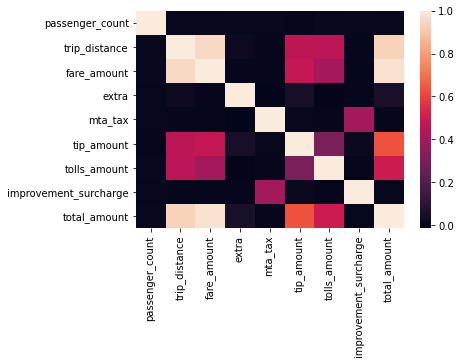

In [94]:
import seaborn as sns
corr = combined.corr()


In [102]:
corr = corr.drop(["tip_amount", "fare_amount", "extra", "mta_tax", "tolls_amount", "improvement_surcharge"])
corr = corr.drop(["tip_amount", "fare_amount", "extra", "mta_tax", "tolls_amount", "improvement_surcharge"], axis = 1)

<AxesSubplot:>

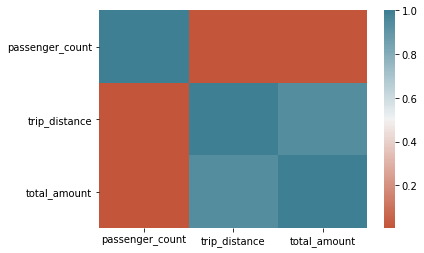

In [103]:
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))

In [105]:
import matplotlib.pyplot as plt

In [113]:
sample = combined.sample(5000)

Text(0, 0.5, 'Total Amount ($)')

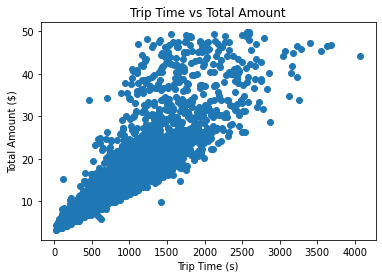

In [173]:
plt.scatter(sample.trip_time, sample.total_amount)
plt.title("Trip Time vs Total Amount")
plt.xlabel("Trip Time (s)")
plt.ylabel("Total Amount ($)")
#plt.savefig("time_cost_scatter.png")

In [174]:
sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
18778066,2,2018-03-10 13:27:04,2018-03-10 13:38:45,6,1.58,1,N,163,230,1,9.0,0.0,0.5,1.96,0.0,0.3,11.760000,701.0
52610661,2,2018-04-18 10:02:56,2018-04-18 10:18:14,1,3.48,1,N,242,213,1,14.0,0.0,0.5,0.00,0.0,0.3,14.800000,918.0
54175735,2,2018-06-22 13:27:33,2018-06-22 13:31:51,1,0.69,1,N,181,228,2,5.0,0.0,0.5,0.00,0.0,0.3,5.800000,258.0
16622233,1,2018-03-02 20:26:05,2018-03-02 20:28:42,2,0.60,1,N,162,100,2,4.0,0.5,0.5,0.00,0.0,0.3,5.300000,157.0
5625612,1,2018-01-23 08:18:10,2018-01-23 08:34:49,1,2.40,1,N,237,234,1,12.0,0.0,0.5,2.55,0.0,0.3,15.350000,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471584,1,2018-02-05 17:27:22,2018-02-05 17:41:36,1,1.90,1,N,140,236,1,10.5,1.0,0.5,1.85,0.0,0.3,14.150000,854.0
20786673,1,2018-03-17 08:23:04,2018-03-17 08:31:39,1,0.90,1,N,224,234,1,7.0,0.0,0.5,1.55,0.0,0.3,9.350000,515.0
30567652,2,2018-04-21 03:49:52,2018-04-21 04:02:07,1,2.12,1,N,166,116,1,10.5,0.5,0.5,0.00,0.0,0.3,11.800000,735.0
19388268,1,2018-03-12 17:59:00,2018-03-12 18:08:30,1,0.90,1,N,162,161,2,7.5,1.0,0.5,0.00,0.0,0.3,9.300000,570.0


In [125]:
sample['trip_time'] = (sample.tpep_dropoff_datetime - sample.tpep_pickup_datetime).astype('timedelta64[s]')

In [128]:
sample = sample[sample.trip_time < 10000]

In [134]:
sample.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
passenger_count,1.000000,0.014611,0.012168,0.015198,NaN,0.011799,0.036957,NaN,0.016971,0.006288
trip_distance,0.014611,1.000000,0.951026,0.010816,NaN,0.452889,0.464577,NaN,0.936495,0.754229
fare_amount,0.012168,0.951026,1.000000,-0.017213,NaN,0.479666,0.402705,NaN,0.975006,0.913691
extra,0.015198,0.010816,-0.017213,1.000000,NaN,0.033395,-0.020262,NaN,0.034889,-0.034599
mta_tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip_amount,0.011799,0.452889,0.479666,0.033395,NaN,1.000000,0.288948,NaN,0.638625,0.442572
tolls_amount,0.036957,0.464577,0.402705,-0.020262,NaN,0.288948,1.000000,NaN,0.501281,0.250359
improvement_surcharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_amount,0.016971,0.936495,0.975006,0.034889,NaN,0.638625,0.501281,NaN,1.000000,0.878393
trip_time,0.006288,0.754229,0.913691,-0.034599,NaN,0.442572,0.250359,NaN,0.878393,1.000000


<AxesSubplot:>

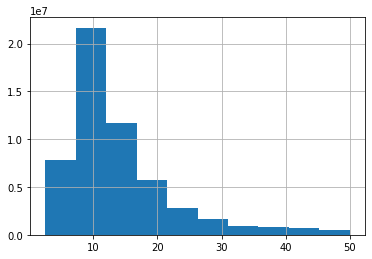

In [144]:
combined.total_amount.hist()

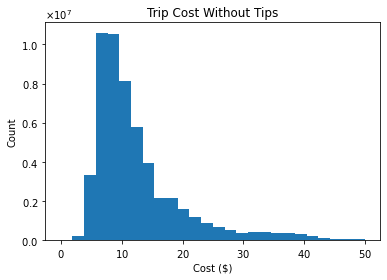

In [202]:
plt.hist(new_comb.cost, bins = int(math.log2(n)) + 1)
plt.title("Trip Cost Without Tips")
plt.xlabel("Cost ($)")
plt.ylabel("Count")
plt.ticklabel_format(useMathText = True)
#plt.savefig("trip_cost_hist_sturges.png")

In [154]:
n = len(combined)

In [197]:
new_comb = engineer(combined)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [206]:
new_comb['price_bin'] = np.vectorize(brackets)(new_comb['cost'])

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [204]:
new_comb.cost.describe(percentiles = [0.2, 0.4, 0.6, 0.8]).round(2)

count    54206264.00
mean            8.99
std             7.61
min             0.00
20%             6.80
40%             8.80
50%            10.30
60%            11.30
80%            16.30
max            49.96
Name: cost, dtype: float64

In [193]:
new_comb[new_comb.trip_time > 75000]

,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,dow,trip_time,cost
339,2,2017-12-31 12:52:15,2018-01-01 12:13:05,1,1.95,1,N,107,68,2,...,0.5,0.5,0.00,0.00,0.3,14.800000,12,6,84050.0,14.800000
406,2,2018-01-01 00:23:33,2018-01-02 00:14:47,2,3.23,1,N,142,236,2,...,0.5,0.5,0.00,0.00,0.3,14.800000,1,0,85874.0,14.800000
1312,2,2018-01-01 00:20:28,2018-01-01 23:05:08,1,1.96,1,N,161,140,1,...,0.5,0.5,0.00,0.00,0.3,10.800000,1,0,81880.0,10.800000
2512,2,2017-12-31 22:15:21,2018-01-01 21:45:23,1,2.14,1,N,48,234,2,...,0.5,0.5,0.00,0.00,0.3,19.799999,12,6,84602.0,19.799999
2640,2,2018-01-01 00:57:40,2018-01-02 00:52:37,2,2.02,1,N,90,48,1,...,0.5,0.5,7.32,0.00,0.3,20.620001,1,0,86097.0,13.300001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54376100,2,2018-06-30 23:47:17,2018-07-01 23:16:12,1,0.97,1,N,255,256,1,...,0.5,0.5,0.00,0.00,0.3,7.300000,6,5,84535.0,7.300000
54376163,2,2018-06-30 23:12:55,2018-07-01 23:07:06,1,4.40,1,N,255,229,1,...,0.5,0.5,2.26,5.76,0.3,24.820000,6,5,86051.0,22.559999
54376271,2,2018-06-30 23:44:57,2018-07-01 23:39:06,1,1.21,1,N,181,228,1,...,0.5,0.5,1.56,0.00,0.3,9.360000,6,5,86049.0,7.800000
54376291,2,2018-06-30 18:37:24,2018-07-01 17:51:23,1,3.11,1,N,260,223,2,...,0.5,0.5,0.00,0.00,0.3,14.300000,6,5,83639.0,14.300000


In [207]:
new_comb

,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,dow,trip_time,cost,price_bin
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,...,0.5,0.00,0.0,0.3,5.800000,1,0,198.0,5.800000,0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,...,0.5,0.00,0.0,0.3,15.300000,1,0,1090.0,15.300000,4
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,...,0.5,1.00,0.0,0.3,8.300000,1,0,355.0,7.300000,1
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,...,0.5,0.00,0.0,0.3,34.799999,1,0,1949.0,34.799999,5
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,...,0.5,2.75,0.0,0.3,16.549999,1,0,1068.0,13.799999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54376755,2,2018-06-30 23:49:16,2018-07-01 00:16:45,1,5.84,1,N,49,164,2,...,0.5,0.00,0.0,0.3,23.299999,6,5,1649.0,23.299999,5
54376756,2,2018-06-30 23:47:33,2018-06-30 23:52:56,1,0.98,1,N,75,75,1,...,0.5,0.00,0.0,0.3,7.300000,6,5,323.0,7.300000,1
54376757,2,2018-06-30 23:28:45,2018-06-30 23:30:46,1,0.46,1,N,25,33,1,...,0.5,0.00,0.0,0.3,5.300000,6,5,121.0,5.300000,0
54376758,2,2018-06-30 23:32:05,2018-06-30 23:50:13,1,2.69,1,N,33,65,1,...,0.5,2.96,0.0,0.3,17.760000,6,5,1088.0,14.800000,4


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8122420039995376

In [208]:
X = new_comb[["PULocationID", "DOLocationID", "trip_distance", "month", "dow", "trip_time"]]
y = new_comb["price_bin"]

In [216]:
model.tree_

In [219]:
from sklearn import tree

In [7]:
test = pd.read_pickle("../../MAST30034_Python/data/crashes_w_zones.pkl")

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/internals/blocks.py'>

In [3]:
test = pd.read_csv("../../MAST30034_Python/data/2018data_w_crashes.csv")

In [6]:
first_3 = test[(test.month == 1) | (test.month == 2) | (test.month == 3)]

In [7]:
first_3.to_pickle("first_3_w_crashes.pkl")

In [15]:
first_3['year'] = first_3.date.dt.year

<ipython-input-15-5851b126ee9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_3['year'] = first_3.date.dt.year


In [14]:
first_3['date'] = first_3['date'].astype("datetime64[ns]")

<ipython-input-14-c3fe0508719b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_3['date'] = first_3['date'].astype("datetime64[ns]")


In [17]:
first_3[first_3.year != 2018]

,Unnamed: 0,VendorID,pickup_time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,cost,price_bin,date,CRASH DATE_x,zone_x,num_crashes_x,CRASH DATE_y,zone_y,num_crashes_y,year
335264,335264,2,2009-01-01 15:20:10,2009-01-01 15:50:15,1,6.47,1,N,75,20,...,26.8,5,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
339919,339919,2,2009-01-01 00:09:24,2009-01-01 00:13:42,1,0.74,1,N,262,236,...,6.3,0,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
500062,500062,2,2009-01-01 10:05:05,2009-01-01 10:15:05,1,2.15,1,N,236,142,...,10.3,3,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
1010886,1010886,2,2001-01-05 11:45:23,2001-01-05 11:52:05,5,1.53,1,N,71,89,...,8.8,2,2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,2001
1353984,1353984,2,2003-01-01 00:25:20,2003-01-01 00:59:32,1,10.41,1,N,137,138,...,35.3,5,2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54038871,54038871,2,2009-01-01 00:17:02,2009-01-01 00:25:28,1,1.35,1,N,7,179,...,7.8,1,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
54193218,54193218,2,2009-01-01 00:38:30,2009-01-01 00:44:44,1,0.95,1,N,223,7,...,6.8,1,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
54194584,54194584,2,2009-01-01 00:55:57,2009-01-01 01:03:51,1,1.13,1,N,7,7,...,7.3,1,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009
54194585,54194585,2,2009-01-01 01:42:58,2009-01-01 01:50:33,1,0.88,1,N,7,179,...,7.3,1,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [18]:
first_3.columns

Index(['Unnamed: 0', 'VendorID', 'pickup_time', 'dropoff_time',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'month', 'dow', 'trip_time', 'cost', 'price_bin',
       'date', 'CRASH DATE_x', 'zone_x', 'num_crashes_x', 'CRASH DATE_y',
       'zone_y', 'num_crashes_y', 'year'],
      dtype='object')

In [19]:
first_3 = first_3.drop(['Unnamed: 0', 'store_and_fwd_flag', 'VendorID', 'fare_amount', \
                        'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', \
                       'CRASH DATE_x', 'zone_x', 'CRASH DATE_y','zone_y'], axis = 1)

In [21]:
first_3 = first_3[first_3['year'] == 2018]

In [27]:
first_3 = first_3.drop(["RatecodeID"], axis = 1)

KeyError: "['RatecodeID'] not found in axis"

In [25]:
first_3.payment_type.describe()

count    2.698980e+07
mean     1.311675e+00
std      4.631777e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: payment_type, dtype: float64

In [28]:
first_3.to_csv("first3_dropped_columns.csv")

In [30]:
sample = first_3.sample(1000)

In [ ]:
import matplotlib.pyplot as plt